<a href="https://colab.research.google.com/github/fathanzys/Data/blob/main/0102522024_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Import Library**

###**1.1 Import Library**

In [ ]:
# 1.1 Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Menonaktifkan peringatan yang tidak krusial
warnings.filterwarnings('ignore', category=RuntimeWarning)

###**1.2 Load Dataset**

In [ ]:
demographic_data = pd.read_csv("demographic.csv", encoding="latin1")
diet_data = pd.read_csv("diet.csv", encoding="latin1")
examination_data = pd.read_csv("examination.csv", encoding="latin1")
labs_data = pd.read_csv("labs.csv", encoding="latin1")
medications_data = pd.read_csv("medications.csv", encoding="latin1")
questionnaire_data = pd.read_csv("questionnaire.csv", encoding="latin1")

In [ ]:
# 1.3 Inspeksi Awal Dataset (5 baris pertama)

demographic_data.head(5)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [ ]:
diet_data.head(5)

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [ ]:
examination_data.head(5)

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [ ]:
labs_data.head(5)

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [ ]:
medications_data.head(5)

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,1,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,1,INSULIN,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,1,GABAPENTIN,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,1,INSULIN GLARGINE,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,1,OLMESARTAN,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0


In [ ]:
questionnaire_data.head(5)

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


#**2. Data Selection**

###**2.1 Penggabungan & Seleksi Fitur**

In [ ]:
# Membuat salinan dari data demografi sebagai dasar dan menggabungkan dataset lain
merged_data = demographic_data.copy()
merged_data = merged_data.merge(examination_data, on='SEQN', how='left')
merged_data = merged_data.merge(labs_data, on='SEQN', how='left')
merged_data = merged_data.merge(medications_data, on='SEQN', how='left')
merged_data = merged_data.merge(questionnaire_data, on='SEQN', how='left')
merged_data = merged_data.merge(diet_data, on='SEQN', how='left')

# Memilih fitur-fitur spesifik untuk analisis
selected_features = ['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1',
                     'DR1TSUGR', 'DR1TCARB',
                     'BMXBMI', 'BMXWAIST',
                     'LBDSGLSI', 'LBXGH', 'LBXIN',
                     'RXDUSE', 'RXDDRUG', 'RXDCOUNT',
                     'DIQ010']

# Membuat dataframe baru yang hanya berisi fitur terpilih
new_data = merged_data[selected_features].copy()

###**2.2 Pembersihan & Imputasi Data**

In [ ]:
# Menghapus kolom 'LBXIN' karena terlalu banyak nilai kosong
new_data = new_data.drop(columns=['LBXIN'])

# Mengisi nilai kosong pada kolom nama obat dengan 'Unknown'
new_data['RXDDRUG'] = new_data['RXDDRUG'].fillna('Unknown')

# Mengisi nilai kosong dengan median untuk kolom numerik lainnya
columns_to_fill_median = [
    'RXDCOUNT', 'LBDSGLSI', 'LBXGH', 'DR1TSUGR',
    'DR1TCARB', 'BMXWAIST', 'BMXBMI'
]
for column in columns_to_fill_median:
    new_data[column] = new_data[column].fillna(new_data[column].median())

# Menghapus baris dimana status diabetes (DIQ010) tidak diketahui
new_data = new_data.dropna(subset=['DIQ010'])
new_data = new_data[new_data['DIQ010'].isin([1.0, 2.0])]

# Mengubah kolom target menjadi format biner (1 = Ya, 0 = Tidak)
new_data['DIQ010'] = new_data['DIQ010'].map({1.0: 1, 2.0: 0})

#**3. EDA**

###**3.1. Pembuatan Fitur Baru**

In [ ]:
# Fungsi untuk membuat kategori BMI
def create_bmi_category(bmi):
    if bmi < 18.5: return 'Underweight'
    elif 18.5 <= bmi < 25: return 'NormalWeight'
    elif 25 <= bmi < 30: return 'Overweight'
    elif 30 <= bmi < 35: return 'Obesity_Class_I'
    elif 35 <= bmi < 40: return 'Obesity_Class_II'
    else: return 'Obesity_Class_III'
new_data['BMICategory'] = new_data['BMXBMI'].apply(create_bmi_category)

In [ ]:
# Fungsi untuk membuat grup usia
def create_age_group(age):
    if age <= 17: return 'Child_Adolescent'
    elif 18 <= age <= 34: return 'YoungAdult'
    elif 35 <= age <= 49: return 'MiddleAged_1'
    elif 50 <= age <= 64: return 'MiddleAged_2'
    elif 65 <= age <= 79: return 'SeniorAdult'
    else: return 'Elderly'
new_data['AgeGroup'] = new_data['RIDAGEYR'].apply(create_age_group)

In [ ]:
# Membuat fitur biner untuk risiko glukosa dan HbA1c
new_data['Glucose_Prediabetic_Risk'] = ((new_data['LBDSGLSI'] >= 100) & (new_data['LBDSGLSI'] < 126)).astype(int)
new_data['Glucose_Diabetic_Level'] = (new_data['LBDSGLSI'] >= 126).astype(int)
new_data['HbA1c_Prediabetic_Risk'] = ((new_data['LBXGH'] >= 5.7) & (new_data['LBXGH'] < 6.5)).astype(int)
new_data['HbA1c_Diabetic_Level'] = (new_data['LBXGH'] >= 6.5).astype(int)

###**3.2. Visualisasi EDA**

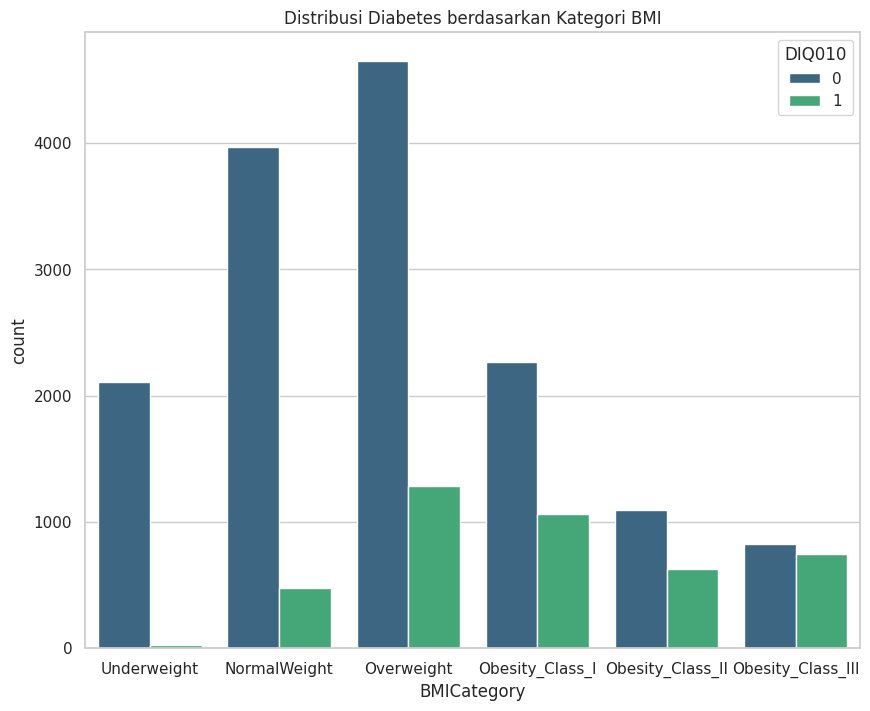

In [ ]:
# Visualisasi Distribusi Diabetes berdasarkan Kategori BMI
plt.figure(figsize=(10, 8))
sns.countplot(data=new_data, x='BMICategory', hue='DIQ010', palette='viridis',
              order=['Underweight', 'NormalWeight', 'Overweight', 'Obesity_Class_I', 'Obesity_Class_II', 'Obesity_Class_III'])
plt.title('Distribusi Diabetes berdasarkan Kategori BMI')
plt.show()

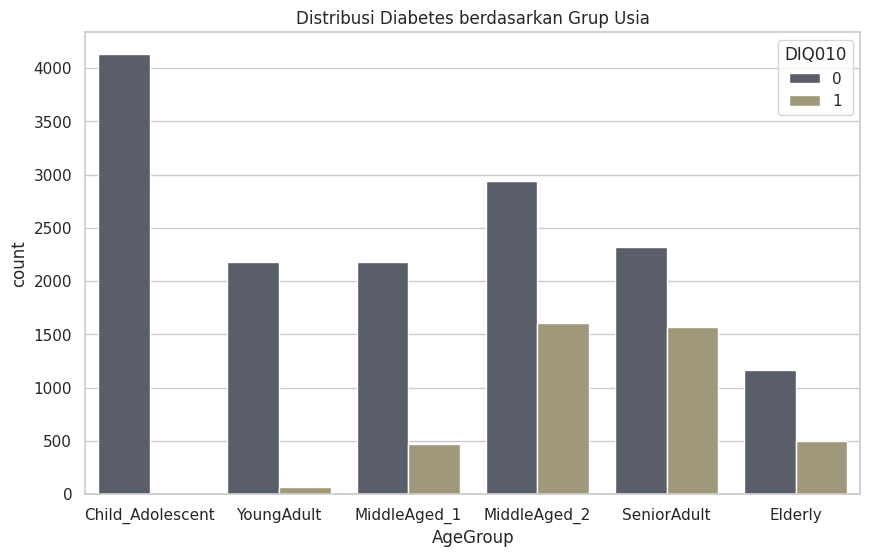

In [ ]:
# Visualisasi Distribusi Diabetes berdasarkan Grup Usia
plt.figure(figsize=(10, 6))
sns.countplot(data=new_data, x='AgeGroup', hue='DIQ010', palette='cividis',
              order=['Child_Adolescent', 'YoungAdult', 'MiddleAged_1', 'MiddleAged_2', 'SeniorAdult', 'Elderly'])
plt.title('Distribusi Diabetes berdasarkan Grup Usia')
plt.show()

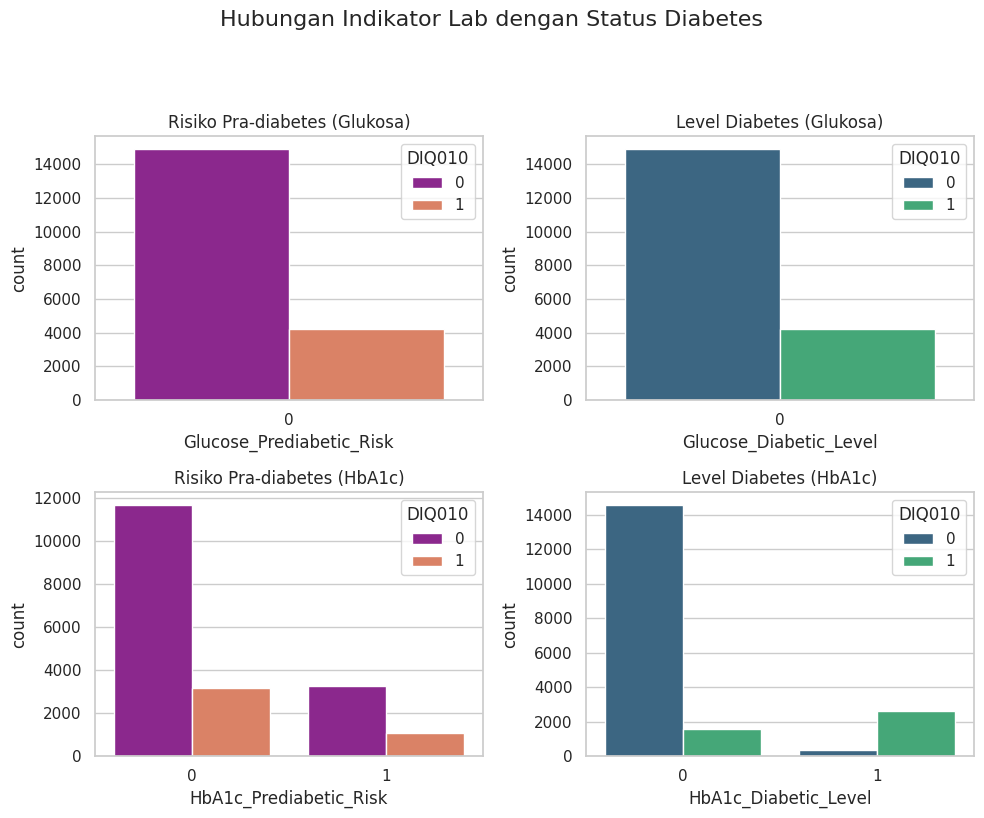

In [ ]:
# Visualisasi Hubungan Indikator Lab dengan Status Diabetes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.suptitle('Hubungan Indikator Lab dengan Status Diabetes', y=1.02, fontsize=16)
sns.countplot(data=new_data, x='Glucose_Prediabetic_Risk', hue='DIQ010', palette='plasma', ax=axes[0, 0])
axes[0, 0].set_title('Risiko Pra-diabetes (Glukosa)')
sns.countplot(data=new_data, x='Glucose_Diabetic_Level', hue='DIQ010', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Level Diabetes (Glukosa)')
sns.countplot(data=new_data, x='HbA1c_Prediabetic_Risk', hue='DIQ010', palette='plasma', ax=axes[1, 0])
axes[1, 0].set_title('Risiko Pra-diabetes (HbA1c)')
sns.countplot(data=new_data, x='HbA1c_Diabetic_Level', hue='DIQ010', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Level Diabetes (HbA1c)')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#**4.Persiapan Akhir untuk Model**

###**4.1. One-Hot Encoding**

In [ ]:
new_data = pd.get_dummies(new_data,
                          columns=['RIAGENDR', 'RIDRETH1', 'RXDDRUG', 'BMICategory', 'AgeGroup'],
                          drop_first=True)

###**4.2. Penanganan Outlier**

In [ ]:
def cap_outliers_iqr(new_data_column):
    Q1 = new_data_column.quantile(0.25)
    Q3 = new_data_column.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return new_data_column.clip(lower=lower_bound, upper=upper_bound)

numeric_cols_to_exclude_from_capping = ['SEQN', 'DIQ010'] + [col for col in new_data.columns if col.startswith(('RIAGENDR_', 'RIDRETH1_', 'RXDDRUG_'))]
cols_to_cap = [col for col in new_data.select_dtypes(include=np.number).columns if col not in numeric_cols_to_exclude_from_capping]

for col in cols_to_cap:
    new_data[col] = cap_outliers_iqr(new_data[col])

###**4.3. Penskalaan Fitur (Feature Scaling)**

In [ ]:
cols_to_scale = [col for col in cols_to_cap if col != 'DIQ010' and col != 'SEQN']
scaler = StandardScaler()
new_data[cols_to_scale] = scaler.fit_transform(new_data[cols_to_scale])

#**5. Modelling**

###**5.1 Split Data**

In [ ]:
X = new_data.drop(columns=["SEQN", "DIQ010"])
y = new_data["DIQ010"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

###**5.2. Pelatihan dan Evaluasi Model**

In [ ]:
models = {
    "Logistic Regression" : LogisticRegression(random_state=42, solver="liblinear"),
    "Random Forest Classifier" : RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBoost" : XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "Accuracy" : accuracy_score(y_test, y_predict),
        "Precision" : precision_score(y_test, y_predict),
        "Recall" : recall_score(y_test, y_predict),
        "F1-Score" : f1_score(y_test, y_predict),
        "ROC-AUC" : roc_auc_score(y_test, y_proba),
        "Confusion Matrix" : confusion_matrix(y_test, y_predict)
    }

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:57:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#**6. Hasil**

###**6.1. Perbandingan Performa Model**

In [ ]:
# Membuat DataFrame dari hasil evaluasi
results_df = pd.DataFrame(results).T.drop(columns='Confusion Matrix')
print("Ringkasan Performa Model")
print(results_df)

Ringkasan Performa Model
                          Accuracy Precision    Recall  F1-Score   ROC-AUC
Logistic Regression       0.915839  0.865546  0.732227  0.793325  0.950261
Random Forest Classifier  0.985625  0.992509  0.941943  0.966565  0.994159
XGBoost                   0.988761  0.989011  0.959716  0.974143  0.990183


###**6.2 Confussion Matrix Model Terbaik**

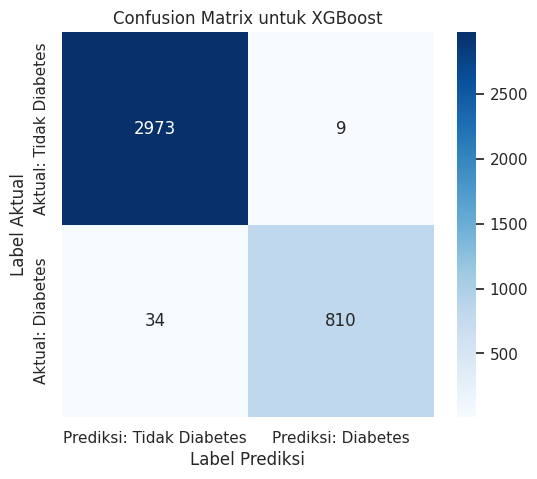

In [ ]:
best_model_name = "XGBoost"
cmatrix = results[best_model_name]["Confusion Matrix"]

plt.figure(figsize=(6, 5))
sns.heatmap(cmatrix, annot=True, fmt='d', cmap="Blues",
           xticklabels=["Prediksi: Tidak Diabetes", "Prediksi: Diabetes"],
           yticklabels=["Aktual: Tidak Diabetes", "Aktual: Diabetes"])
plt.title(f"Confusion Matrix untuk {best_model_name}")
plt.xlabel("Label Prediksi")
plt.ylabel("Label Aktual")
plt.show()